In [1]:
import gensim
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
keywords = ['improvement', 'improvements', 'improving']


In [2]:
from gensim.models import KeyedVectors
import os

model_dirs = ["../data/models/bpo/"]#, "../data/models/ecco/"]
ld = []
for model_dir in model_dirs:
    for filename in sorted(os.listdir(model_dir)):
        if filename.endswith(".txt.gz"):
            print(filename)
            model_path = os.path.join(model_dir, filename)
            corpus = filename.split(".")[1]
            decade = filename.split(".")[2]
            run = filename.split(".")[3]
            run = 1 if not run.startswith("run") else int(run.split("_")[1])
            model = KeyedVectors.load_word2vec_format(model_path, binary=False)
            for keyword in keywords:
                try:
                    for rank, (word, cosine_similarity) in enumerate(
                        model.most_similar(keyword, topn=100)
                    ):
                        d = {
                            "decade": decade,
                            "corpus": corpus,
                            "run": run,
                            "keyword": keyword,
                            "word": word,
                            "rank": rank + 1,
                            "cosine_similarity": cosine_similarity,
                        }
                        ld.append(d)
                except KeyError as e:
                    pass
df = pd.DataFrame(ld)

word2vec.BPO.1680-1689.run_01.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_02.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_03.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_04.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_05.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_06.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_07.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_08.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_09.skipgram_n=5.model.txt.gz
word2vec.BPO.1680-1689.run_10.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_01.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_02.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_03.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_04.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_05.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_06.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_07.skipgram_n=5.model.txt.gz
word2vec.BPO.1690-1699.run_08.skipgram_n=5.model

In [3]:
dfx = df.query('rank <= 25')
word_counts = dfx.groupby(['decade', 'corpus', 'keyword', 'word']).size().reset_index(name='count')
df2 = dfx.merge(word_counts, on=['decade', 'corpus', 'keyword', 'word'])
df2 = df2[df2['count'] > 1]
df_avg = df2.groupby(['decade', 'corpus', 'keyword','word']).median().reset_index()
word_counts2 = df_avg.groupby(['corpus', 'keyword', 'word']).size().reset_index(name='period_count')
df_avg = df_avg.merge(word_counts2, on=['corpus', 'keyword', 'word'])
df_avg = df_avg[df_avg['period_count'] > 1]
df_avg = pd.concat(
    gdf.sort_values(['count','cosine_similarity'], ascending=[False,False]).assign(rank=list(range(len(gdf))))
    for _, gdf in df_avg.groupby(['decade', 'corpus', 'keyword'])
)
df_avg['rank'] += 1
# # df_avg = df2.groupby(['decade', 'corpus', 'keyword','word']).mean().reset_index()
# # # Use rank function within each group
# # df_avg['rank'] = df_avg.groupby(['decade', 'corpus', 'keyword'])['count'].rank(method='dense', ascending=False)

# # # Tiebreaker using cosine_similarity
# # df_avg['rank'] = df_avg.groupby(['decade', 'corpus', 'keyword']).apply(
# #     lambda x: x.sort_values(['rank', 'cosine_similarity'], ascending=[True, False]).index.to_series().rank(method='first')
# # ).reset_index(level=[0,1,2], drop=True)


# # df_avg.sort_values(['decade', 'corpus', 'keyword', 'rank'], inplace=True)
df_avg

,decade,corpus,keyword,word,run,rank,cosine_similarity,count,period_count
25,1690-1699,BPO,improvement,performances,5.0,1,0.789253,3.0,2
29,1690-1699,BPO,improvement,preservation,4.0,2,0.803923,2.0,2
18,1690-1699,BPO,improvement,growth,6.0,3,0.778412,2.0,3
5,1690-1699,BPO,improvement,composition,6.0,4,0.777659,2.0,2
46,1690-1699,BPO,improvements,architecture,6.5,1,0.844560,8.0,2
...,...,...,...,...,...,...,...,...,...
2532,1890-1899,BPO,improving,establishing,5.5,24,0.426369,4.0,12
2524,1890-1899,BPO,improving,checking,5.5,25,0.425860,4.0,3
2521,1890-1899,BPO,improving,altering,7.0,26,0.442795,3.0,8
2548,1890-1899,BPO,improving,securing,3.0,27,0.430957,3.0,7


In [8]:
import plotnine as p9
p9.options.figure_size = (18, 12)
figdf = df_avg[df_avg.keyword=='improvement']
figdf = figdf[figdf.corpus=='BPO']
figdf = figdf.query('rank <= 25')

from scipy import stats

figdf['decade_num'] = figdf['decade'].apply(lambda x: int(x.split('-')[0]))
def calc_regression(group):
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['decade_num'], group['rank'])
    return pd.Series({'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value})

regression_results = figdf.groupby('word').apply(calc_regression).reset_index()

# Merge regression results back to the original dataframe
figdf = figdf.merge(regression_results, on='word')

# Sort words by absolute slope value
# word_order = figdf.groupby('word')['slope'].mean().abs().sort_values(ascending=False).index
figdf['significant'] = figdf['p_value'] < 0.05


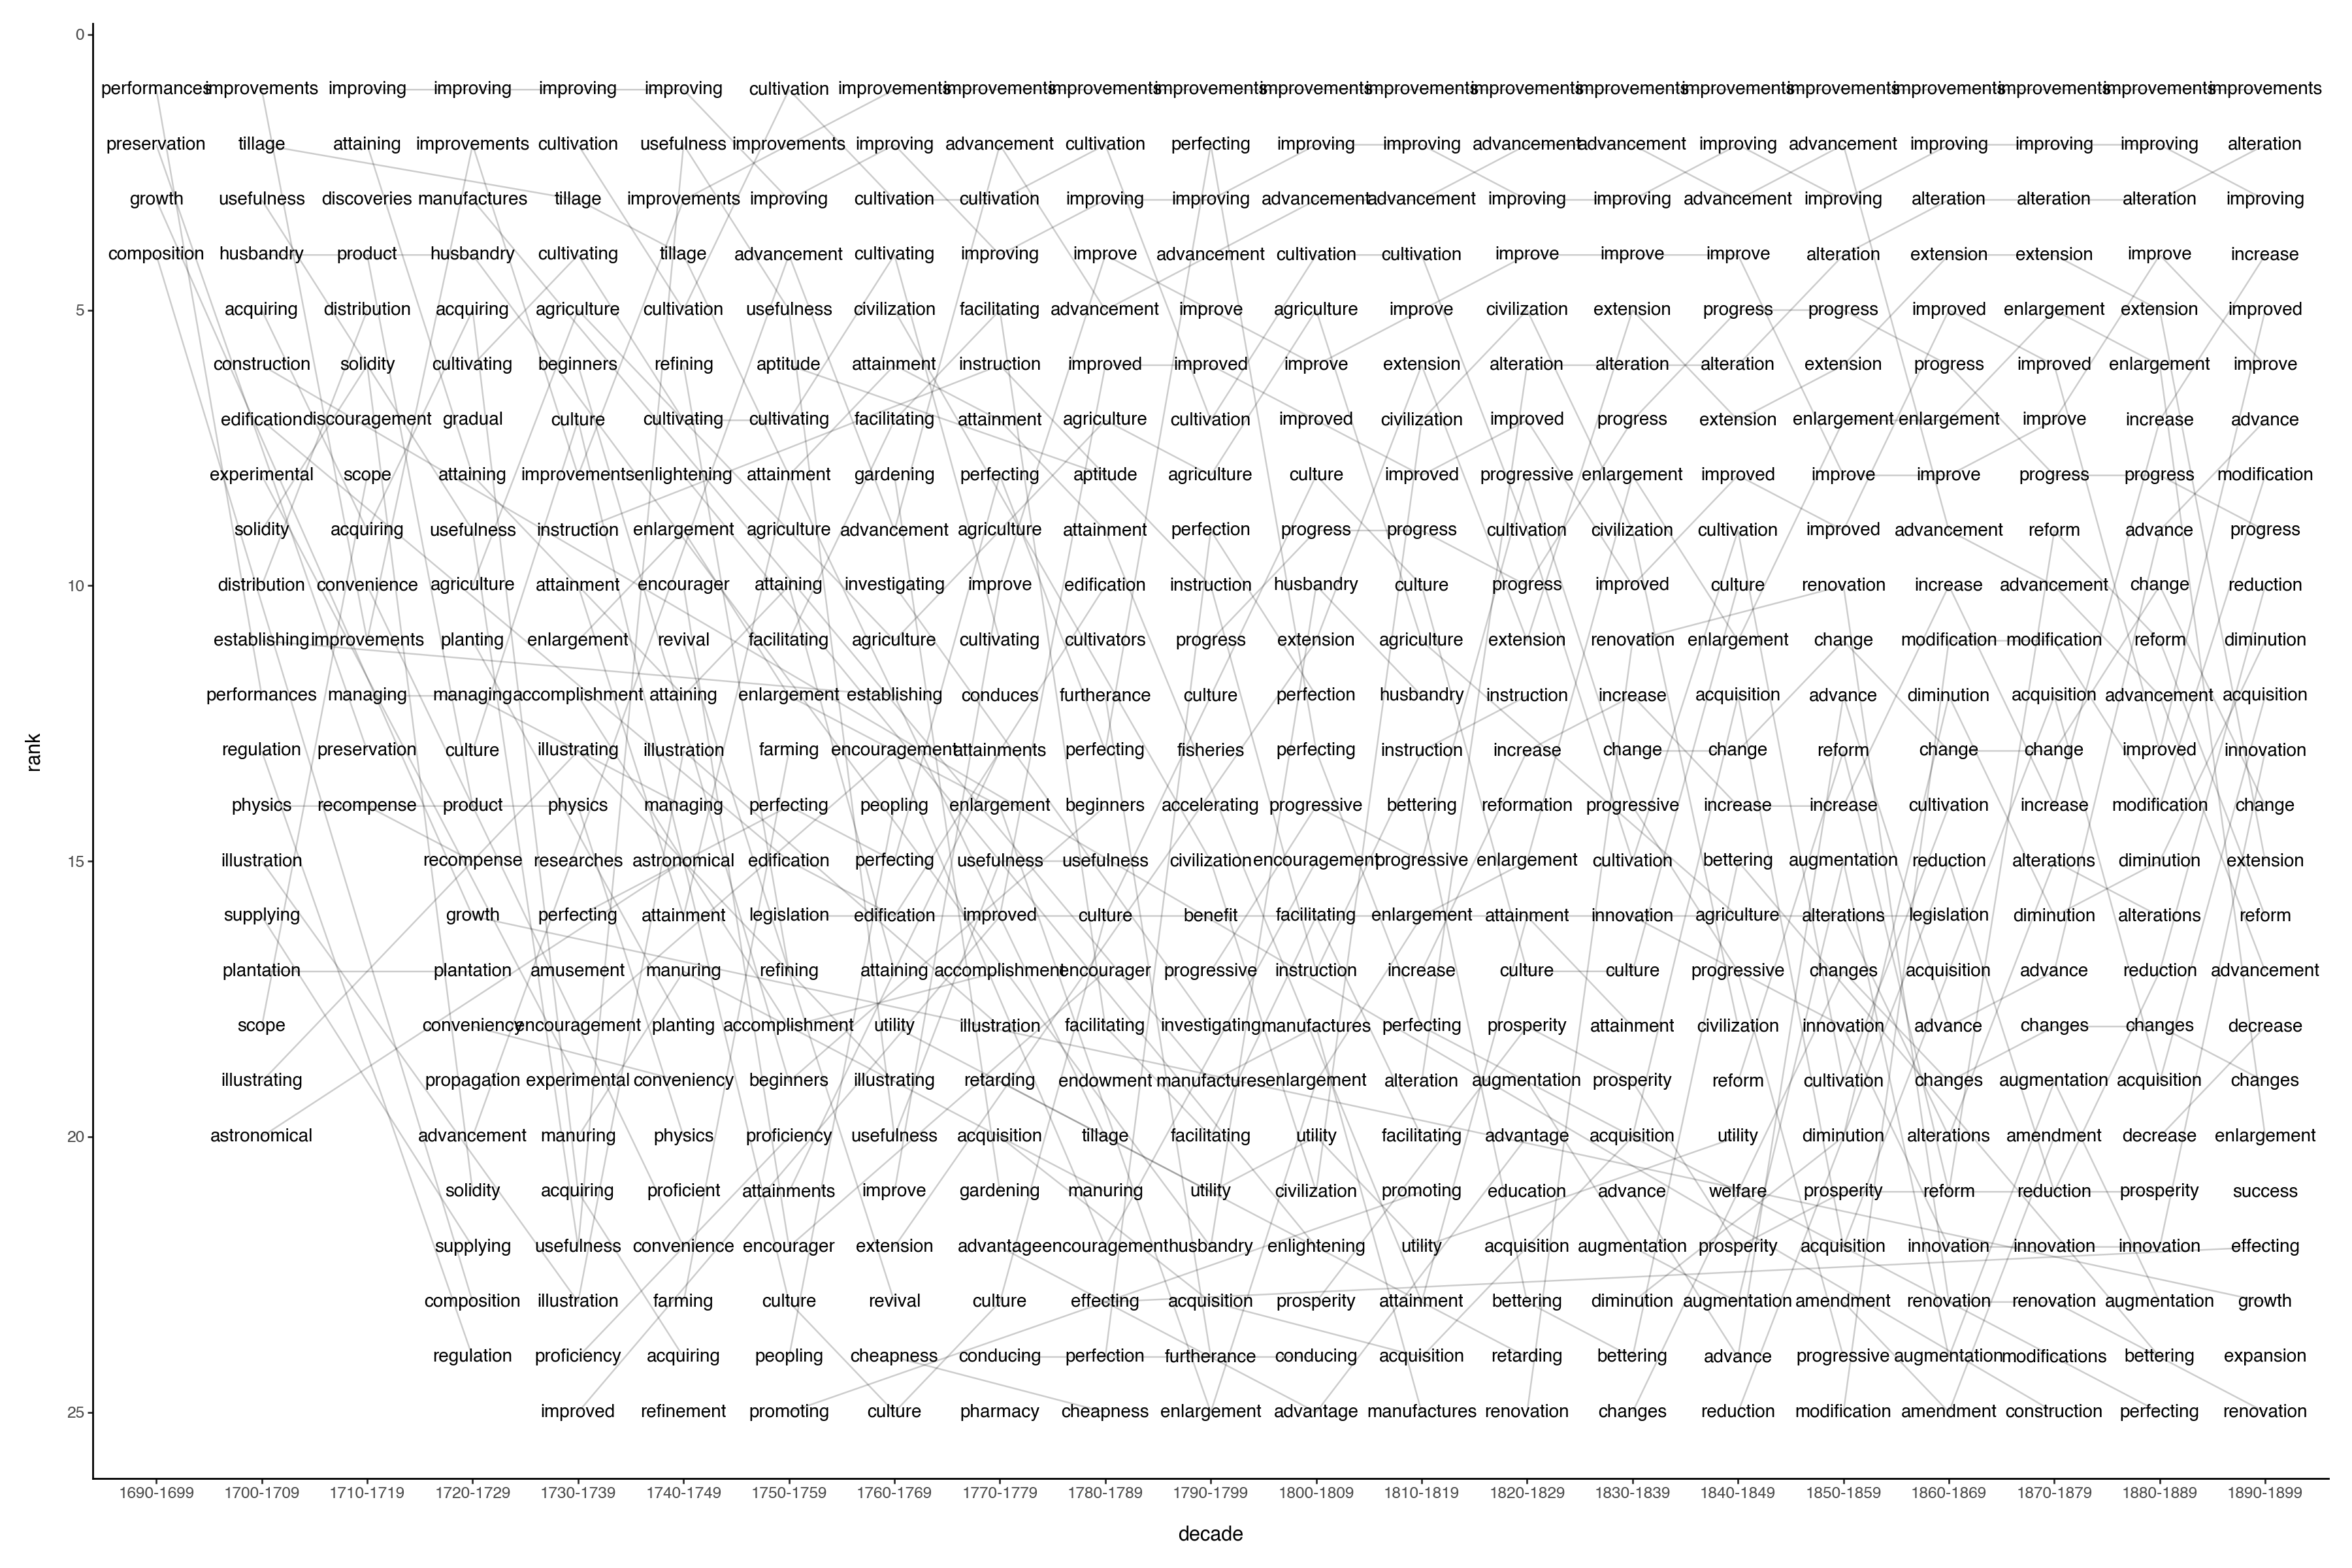

In [12]:

fig = p9.ggplot(figdf, p9.aes(x='decade', y='rank'))
fig += p9.geom_line(p9.aes(group='word'), alpha=0.2)
fig += p9.geom_text(p9.aes(label='word'), size=10)
# fig += p9.facet_wrap('corpus')
fig += p9.scale_y_reverse()
fig += p9.theme_classic()
fig.save('bpo_neighbors.png')
fig